In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
sns.set_style('darkgrid')
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import imageio
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# First part

In [130]:
ODI = pd.read_csv('ODI-2020.csv', sep=None)
ODI.columns=['major','machine','infor','statistics'
             ,'database','gender','choco','birthday','neighbors','stand','stress','money','random','bed','good1','good2']

In [131]:
def test_filter(k):
    str = k
    str_list = str.split()
    return (str_list)

In [132]:
ODI

,major,machine,infor,statistics,database,gender,choco,birthday,neighbors,stand,stress,money,random,bed,good1,good2
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0.0,4,227,22:30,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85.0,25,65,23:05,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50.0,10,3,10pm,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10.0,99,2,23,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60.0,80,7,22:00,Sun is shining,Intimate contact with friends and family
5,Business Analytics,yes,1,mu,ja,male,fat,11-09,0,no,0.0,10,6,23:20,sun,full agenda
6,DHPQRM,no,0,mu,nee,female,neither,27.08.1996,0,no,71.0,10,4,0:35,coffee chat with a friend,jogging in sunny weather
7,Computer Science master,no,0,mu,ja,male,I have no idea what you are talking about,15/03/1992,>100,no,10.0,the amount of money you want to distribute/the...,256,00:35,Enough sleep,No rain
8,BA,yes,0,mu,ja,female,neither,31-08-1998,2,no,0.0,50,3,23:30,Friends,Being productive
9,Master Business Administration: Digital Busine...,no,0,sigma,nee,male,fat,07-11-1995,1,no,22.0,"Based on 500 students: €0,20",8,23,Done a workout,Wake up early


In [122]:
ODI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 16 columns):
major         280 non-null object
machine       280 non-null object
infor         280 non-null object
statistics    280 non-null object
database      280 non-null object
gender        280 non-null object
choco         280 non-null object
birthday      280 non-null object
neighbors     280 non-null object
stand         280 non-null object
stress        280 non-null object
money         280 non-null object
random        280 non-null object
bed           278 non-null object
good1         280 non-null object
good2         280 non-null object
dtypes: object(16)
memory usage: 35.1+ KB


In [75]:
ODI.gender.value_counts(normalize=True)

male       0.564286
female     0.421429
unknown    0.014286
Name: gender, dtype: float64

In [76]:
ODI.infor.value_counts(normalize=True)

0          0.671429
1          0.282143
unknown    0.046429
Name: infor, dtype: float64

In [77]:
ODI.machine.value_counts(normalize=True)

yes        0.635714
no         0.353571
unknown    0.010714
Name: machine, dtype: float64

In [78]:
ODI.statistics.value_counts(normalize=True)

mu         0.860714
sigma      0.096429
unknown    0.042857
Name: statistics, dtype: float64

In [79]:
ODI.database.value_counts(normalize=True)

ja         0.514286
nee        0.464286
unknown    0.021429
Name: database, dtype: float64

In [83]:
string=('Machine','Information','statistics','database')
knownothing=(0.353571,0.282143, 0.096429,0.464286)

Text(0.5, 1.0, 'We know nothing')

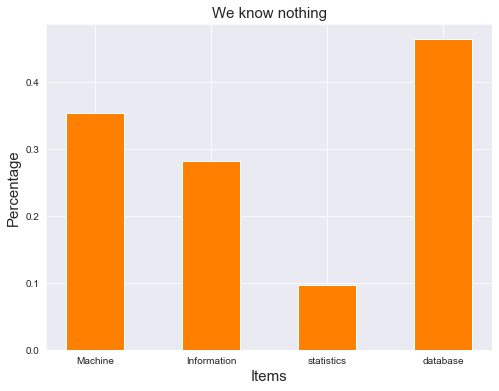

In [98]:
plt.figure(figsize=(8,6))
plt.bar(string,knownothing,width=0.5,color='#ff8000')
plt.xlabel('Items',size=15)
plt.ylabel('Percentage',size=15)
plt.title('We know nothing',size=15)

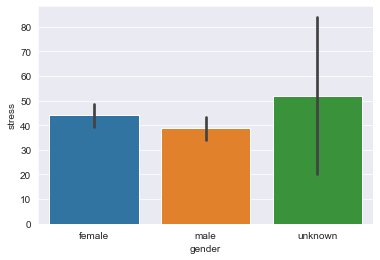

In [136]:
def convert_currency(value):
    new_value = value.replace('0,5', ' 1').replace('8-100','50 ').replace('-','0')
    return np.float(new_value)

# ODI['stress'].apply(convert_currency)

ODI['stress'] = ODI['stress'].astype('float')

stresslist=[ODI['stress'][i] for i in range(len(ODI['stress']))]

sns.barplot(ODI['gender'],ODI['stress'])

In [104]:
ODI['stress'][0]

'0'

([<matplotlib.patches.Wedge at 0x1a162fe748>,
 [Text(0.5057955603938474, -1.5179495548554551, 'male'),
  Text(-0.573388943037229, 1.4937285965002645, 'female'),
  Text(1.3483533773779541, 0.86136123067704, 'unknow')],
 [Text(0.37934667029538555, -1.1384621661415912, '56.43%'),
  Text(-0.4300417072779217, 1.1202964473751982, '42.14%'),
  Text(1.0112650330334654, 0.6460209230077799, '1.43%')])

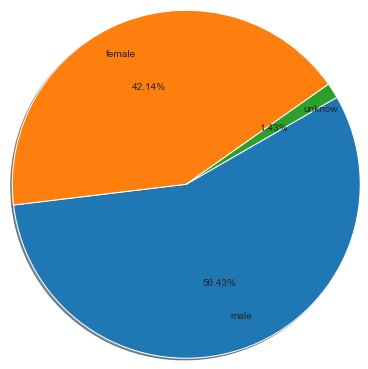

In [67]:
plt.pie(ODI.gender.value_counts(),labels=['male','female','unknow'],autopct='%1.2f%%',shadow=True,labeldistance=0.8,startangle=30,radius=2,counterclock=False)

In [129]:
#class_mapping = {'no':0, 'yes':1,'unknow':2}
#ODI['stand'] = ODI['stand'].map(class_mapping)

# wordcolud

In [24]:
goodlist=[]
for i in range(len(ODI['good1'])):
    goodlist.append(ODI['good1'][i])
    goodlist.append(ODI['good2'][i])
def test_filter(k):
    str = k
    str_list = str.split()
    return (str_list)

In [43]:
cloud=[]
for i in range(len(goodlist)):
    h=test_filter(goodlist[i])
    for k in h:
        cloud.append(k)
mk = imageio.imread("miner.jpg")

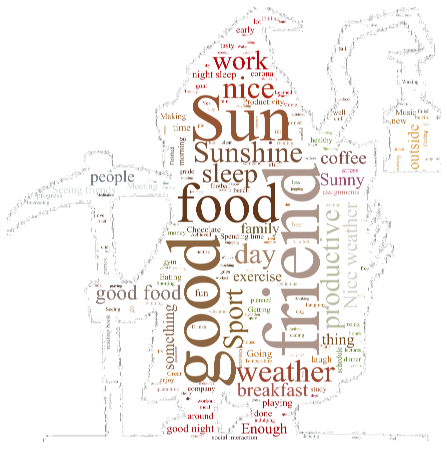

In [61]:
unique_string=(" ").join(cloud)
wordcloud = WordCloud(width=1000,
                        height=700,
                        mask=mk,
                      font_path='./TimesNewRoman.ttf',
                      background_color='white',
                      contour_width=3, contour_color='black',
                        scale=15).generate(unique_string)
image_colors = ImageColorGenerator(mk)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()

# 1.2

In [67]:
import nltk
from nltk.corpus import movie_reviews

# Loading movie review

In [519]:
df_movie=pd.DataFrame(columns = ['Number','Attitute','Content','Score']) 
df_movie['Number']=np.arange(0,2000,1)
df_movie.loc[np.arange(0,1000,1),'Attitute']=0
df_movie.loc[np.arange(1000,2000,1),'Attitute']=1

In [520]:
import os
import codecs
import glob
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/neg')

def txtcombine(df):
    
    files = glob.glob('*.txt')
    z=0
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine(df_movie)
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/pos')

def txtcombine_2(df):
    
    files = glob.glob('*.txt')
    z=1000
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine_2(df_movie)

In [521]:
df_movie.head()

,Number,Attitute,Content,Score
0,0,0,bad . bad . bad . that one word seems to prett...,NaN
1,1,0,isn't it the ultimate sign of a movie's cinema...,NaN
2,2,0,""" gordy "" is not a movie , it is a 90-minute-...",NaN
3,3,0,disconnect the phone line . don't accept the c...,NaN
4,4,0,when robert forster found himself famous again...,NaN


# LogisticRegression training

In [527]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_movie.Content.values, df_movie.Attitute.values,
                                                    stratify=df_movie.Attitute.values, test_size=0.2,
                                                    random_state=50)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [524]:
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score   
# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# for train, test in kfold.split(df_movie.Content.values):
#     classifier = LogisticRegression() 
#     training_vec = vector.fit_transform(df_movie.Content.values[train])
#     clf=classifier.fit(training_vec,df_movie.Attitute[train])
#     evaluation_vector = vector.transform(df_movie.Content.values[test])
#     print(clf.score(evaluation_vector, df_movie.Attitute[test]))

# LogisticRegression cross+predict

In [547]:
from sklearn import svm

vector = TfidfVectorizer()
param = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize, None],
               'clf__C': [1.0, 10.0, 100.0]}
             ]

lr = Pipeline([('vect', vector),
                     ('clf', LogisticRegression(random_state=10))])

log = GridSearchCV(lr, param,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

log.fit(X_train, y_train)

# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# classifier0 = svm.LinearSVC() 
# training_vec = vector.fit_transform(df_movie.Content.values)
# linear=cross_val_score(classifier0, training_vec, df_movie.Attitute.values, cv=kfold)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [ ]:
 LogisticRegression()

In [568]:
clf_logis = log.best_estimator_
prediction_1=clf_logis.predict(X_test)
print('Accuracy, F1',clf_logis.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_1))

Accuracy, F1 0.8675 0.8684863523573201


# SVM cross+predict

In [566]:
from sklearn import svm

vector_1 = TfidfVectorizer()
param_1 = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize, None],
               'clf__C': [1.0, 10.0, 100.0]},
#               {
#                'vect__stop_words': [stopwords.words(), None],
#                'vect__tokenizer': [word_tokenize, None],
#                'clf__C': [1.0, 10.0, 100.0]},
             ]

lr_1 = Pipeline([('vect', vector_1),
                     ('clf', svm.LinearSVC()) ])

svm = GridSearchCV(lr_1, param_1,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

svm.fit(X_train, y_train)

# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# classifier1 = LogisticRegression() 
# training_vec = vector.fit_transform(df_movie.Content.values)
# cross_val_score(classifier1, training_vec, df_movie.Attitute.values, cv=kfold)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [570]:
svm_1 = svm.best_estimator_
prediction_2=svm_1.predict(X_test)
svm_1.score(X_test, y_test)
print('Accuracy, F1',svm_1.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_2))

Accuracy, F1 0.87 0.8712871287128714


# Part2

In [3]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['PassengerId']
PassengerId = test['PassengerId']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (891, 12) 
The test data size before dropping Id feature is : (418, 11) 

The train data size after dropping Id feature is : (891, 11) 
The test data size after dropping Id feature is : (418, 10) 


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 10)


In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


Text(0.5, 1.0, 'Percent missing data by feature')

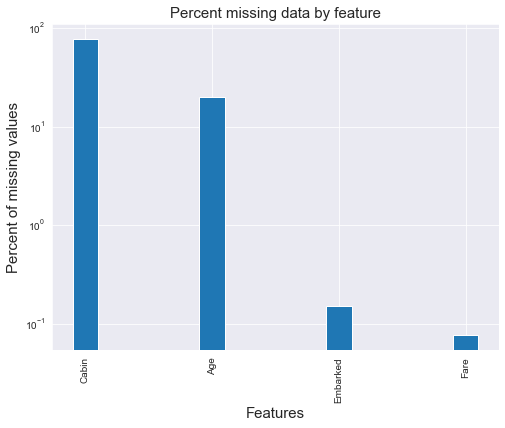

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='90')
plt.bar(x=all_data_na.index, height=all_data_na,width=0.2)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.yscale('log')
plt.title('Percent missing data by feature', fontsize=15)

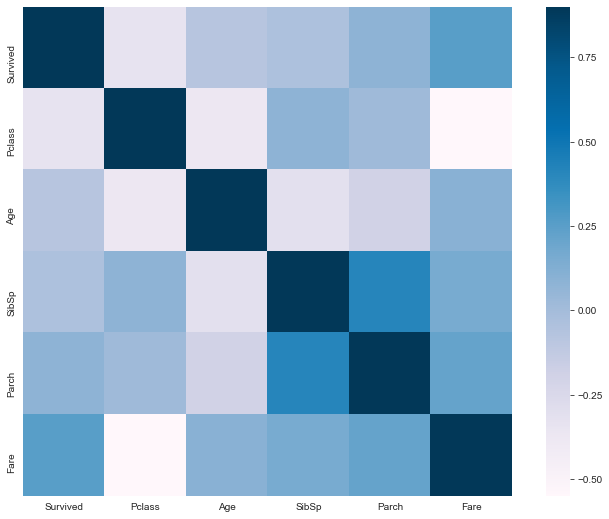

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap='PuBu')

In [22]:
print(df_dead,df_alived)

0    0.811092
1    0.188908
Name: Survived, dtype: float64 0    0.257962
1    0.742038
Name: Survived, dtype: float64


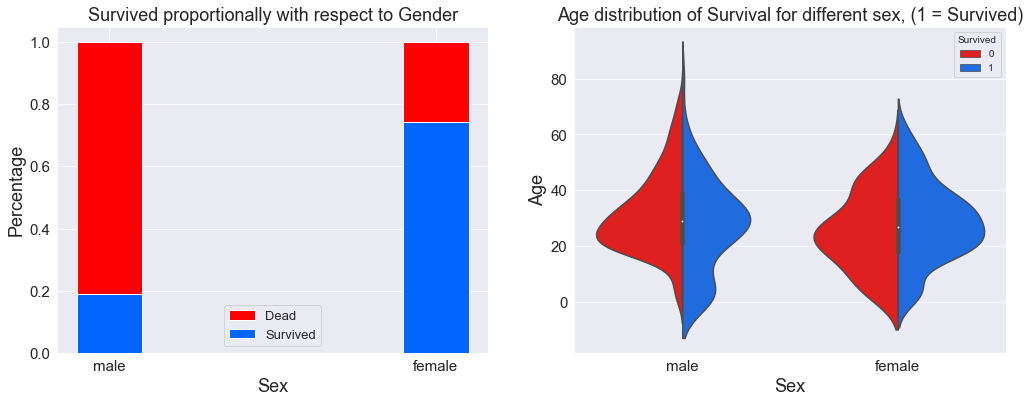

In [21]:
fig = plt.figure(figsize=(17,6))
df_dead = train.Survived[train.Sex == 'male'].value_counts(normalize=True).sort_index()
df_alived = train.Survived[train.Sex == 'female'].value_counts(normalize=True).sort_index()
ax1 = fig.add_subplot(121)
plt.tick_params(labelsize = 15)
plt.bar(['male','female'],[1,1],width=0.2,color="#ff0000",label='Dead')
plt.bar(['male','female'],[df_dead[1],df_alived[1]],width=0.2,color="#0066ff",label='Survived')
plt.title("Survived proportionally with respect to Gender",size=18)
plt.legend(fontsize=13,loc='best') 
plt.ylabel('Percentage',size=18)
plt.xlabel('Sex',size=18)
# #adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
plt.title("Age distribution of Survival for different sex, (1 = Survived)",size=18)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train,split=True,palette={0: "#ff0000", 1: "#0066ff"})
plt.ylabel('Age',size=18)
plt.xlabel('Sex',size=18)
plt.tick_params(labelsize = 15)
plt.savefig('sex_age_diff.jpg',dpi=200,bbox_inches='tight')

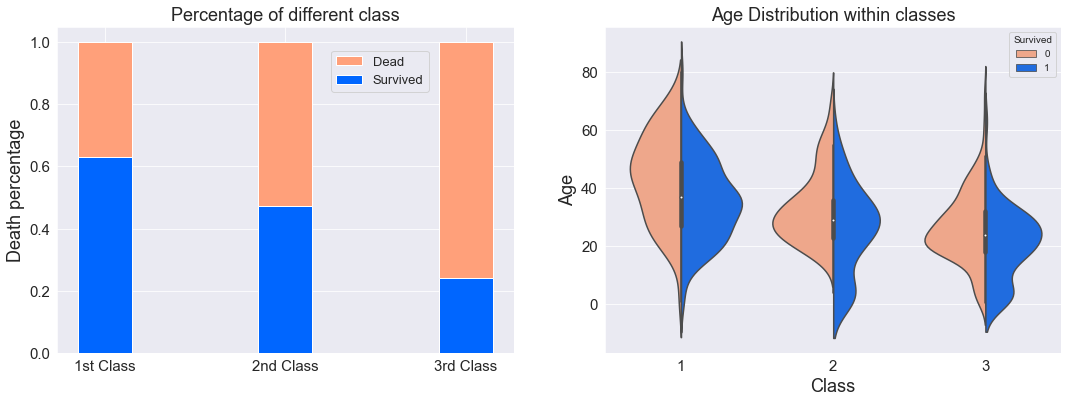

In [28]:
fig = plt.figure(figsize=(18,6))
# plots a kernel density estimate of the subset of the 1st class passangers's age
ax1 = fig.add_subplot(121)
df_3 = train.Survived[train.Pclass == 3].value_counts(normalize=True)[1]
df_2 = train.Survived[train.Pclass == 2].value_counts(normalize=True)[1]
df_1 = train.Survived[train.Pclass == 1].value_counts(normalize=True)[1]
plt.bar(['1st Class', '2nd Class','3rd Class'],[1,1,1],width=0.3,color='#FFA07A',label='Dead')
plt.bar(['1st Class', '2nd Class','3rd Class'],[df_1,df_2,df_3],width=0.3,color='#0066ff',label='Survived')
plt.title('Percentage of different class',size=18)
plt.ylabel('Death percentage',size=18)
plt.legend(fontsize=13,loc=(0.6,0.8))
plt.tick_params(labelsize = 15)
ax1 = fig.add_subplot(122)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train,split=True,palette={0: "#FFA07A", 1: "#0066ff"})
plt.xlabel("Class",size=18) 
plt.ylabel("Age",size=18) 
plt.tick_params(labelsize = 15)
plt.title("Age Distribution within classes",size=18)
plt.savefig('class_age_diff.jpg',dpi=200,bbox_inches='tight')

In [62]:
 train.Sex[train.Pclass == 1][train.Survived==0].value_counts()

male      77
female     3
Name: Sex, dtype: int64

In [29]:
df_3 

0.24236252545824846

In [41]:
k=train.SibSp.value_counts()
list1=train.SibSp[train.Survived == 0].value_counts()

In [43]:
list1=list1/k

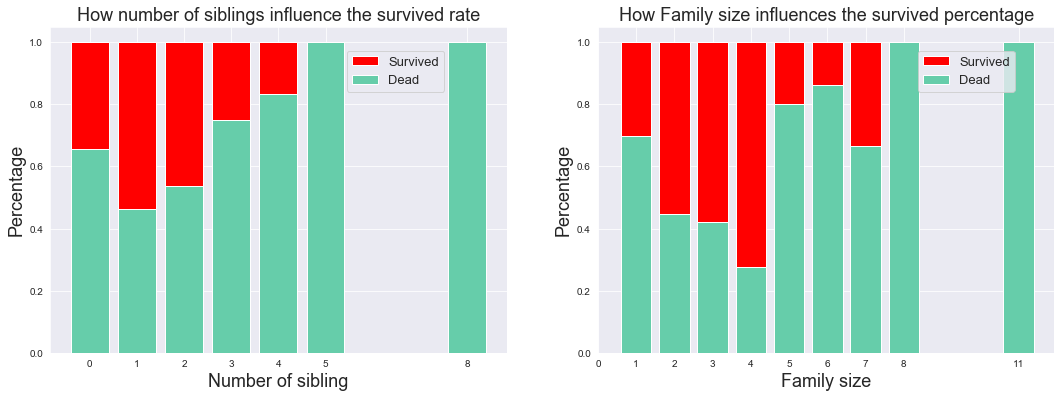

In [131]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
plt.bar([0,1,2,3,4,5,8],[1,1,1,1,1,1,1],color='#ff0000',label='Survived')
plt.bar([0,1,2,3,4,5,8],list1,color='#66CDAA',label='Dead')
plt.xticks([0,1,2,3,4,5,8])
plt.xlabel('Number of sibling',size=18)
plt.ylabel('Percentage',size=18)
plt.legend(fontsize=13,loc=(0.65,0.8))
plt.title('How number of siblings influence the survived rate',size=18)
ax1 = fig.add_subplot(122)
plt.bar([1,2,3,4,5,6,7,8,11],[1,1,1,1,1,1,1,1,1],color='#ff0000',label='Survived')
plt.bar([1,2,3,4,5,6,7,8,11],list2,color='#66CDAA',label='Dead')
plt.xticks([0,1,2,3,4,5,6,7,8,11])
plt.xlabel('Family size',size=18)
plt.ylabel('Percentage',size=18)
plt.legend(fontsize=13,loc=(0.7,0.8))
plt.title('How Family size influences the survived percentage',size=18)
plt.savefig('family.jpg',dpi=200,bbox_inches='tight')

In [30]:
train['FamilySize']=train['SibSp']+train['Parch']+1

In [48]:
k2=train.FamilySize.value_counts()
list2=train.FamilySize[train.Survived == 0].value_counts()
list2=list2/k2

In [81]:
dfs=train.Survived[train.Embarked=='S'].value_counts(normalize=True)[0]
dfc=train.Survived[train.Embarked=='C'].value_counts(normalize=True)[0]
dfq=train.Survived[train.Embarked=='Q'].value_counts(normalize=True)[0]

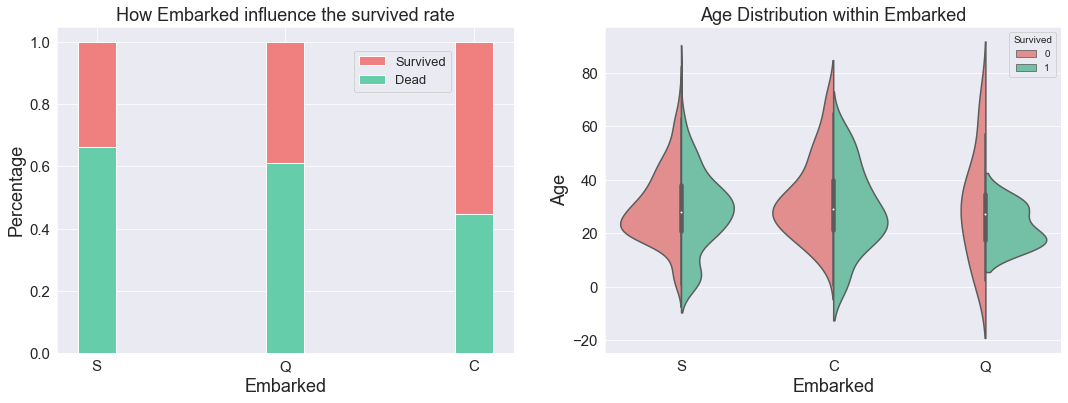

In [132]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
plt.bar(['S','Q','C'],[1,1,1],color='#F08080',label='Survived',width=0.2)
plt.bar(['S','Q','C'],[dfs,dfq,dfc],color='#66CDAA',label='Dead',width=0.2)
plt.xlabel('Embarked',size=18)
plt.ylabel('Percentage',size=18)
plt.tick_params(labelsize = 15)
plt.legend(fontsize=13,loc=(0.65,0.8))
plt.title('How Embarked influence the survived rate',size=18)
ax1 = fig.add_subplot(122)

sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train,split=True,palette={0: "#F08080", 1: "#66CDAA"})
plt.xlabel("Embarked",size=18) 
plt.ylabel("Age",size=18) 
plt.tick_params(labelsize = 15)
plt.title("Age Distribution within Embarked",size=18)
plt.savefig('embarked.jpg',dpi=200,bbox_inches='tight')

In [134]:
train['Split'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Split'] = train['Split'].replace(['Mme','Ms'],'Mrs')
train['Split'] = train['Split'].replace(['Mlle'],'Miss')
train['Split'] = train['Split'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady','Jonkheer'],'Roy')
train['Split'] = train['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')
train['Split'] = train['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')

# Combine data

In [5]:
target = train.Survived

In [6]:
train.drop(['Survived'], 1, inplace=True)

In [7]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index','PassengerId'], inplace=True, axis=1)

# mapping sex 

In [9]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

# Cabin

In [10]:
combined.loc[combined.Cabin.isnull(), 'Cabin'] = 'U'
for i in range(len(combined.Cabin)):
    if combined.Cabin[i] != 'U':
        combined.Cabin[i]=combined.Cabin[i][0]

In [11]:
combined.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

# Split title

In [12]:
combined['Split'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [13]:
combined['Split'] = combined['Split'].replace(['Mme','Ms'],'Mrs')
combined['Split'] = combined['Split'].replace(['Mlle'],'Miss')
combined['Split'] = combined['Split'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady','Jonkheer'],'Roy')
combined['Split'] = combined['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')

In [14]:
combined.Split.value_counts()

Mr        757
Miss      262
Mrs       200
Master     61
Stuff      23
Roy         6
Name: Split, dtype: int64

# Embark

In [15]:
combined[combined.Embarked.isnull().values==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split
61,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B,NaN,Miss
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B,NaN,Mrs


In [16]:
# combined['Embarked'].fillna('S',inplace=True)
combined['Embarked'].fillna('C',inplace=True)

# Family

In [17]:
combined['Fam']=combined['SibSp']+combined['Parch']+1


In [18]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) or (s == 1):
        return 1
    else:
        return 0

In [19]:
Fam_Co = dict(combined['Fam'].value_counts())
combined['Fam_con']=combined['Fam'].apply((Fam_label))

In [20]:
combined['Fam_con'].value_counts()

1    853
2    437
0     19
Name: Fam_con, dtype: int64

# Fare

In [21]:
combined['Fare'].fillna(combined[(combined['Embarked'] == 'S') & (combined['Pclass'] == 1)].Fare.median(),inplace=True)

# Age

In [22]:
combined[combined.Age.isnull().values==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Fam,Fam_con
5,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,U,Q,Mr,1,1
17,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,U,S,Mr,1,1
19,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,U,C,Mrs,1,1
26,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,U,C,Mr,1,1
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,U,Q,Miss,1,1
29,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,U,S,Mr,1,1
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B,C,Mrs,2,2
32,3,"Glynn, Miss. Mary Agatha",0,NaN,0,0,335677,7.7500,U,Q,Miss,1,1
36,3,"Mamee, Mr. Hanna",1,NaN,0,0,2677,7.2292,U,C,Mr,1,1
42,3,"Kraeff, Mr. Theodor",1,NaN,0,0,349253,7.8958,U,C,Mr,1,1


In [23]:
begin = combined[['Age', 'Pclass','Sex','Split']]
begin  = pd.get_dummies(begin)
ageyes = begin[begin.Age.notnull()].as_matrix()
ageno = begin[begin.Age.isnull()].as_matrix()

In [24]:
from sklearn.ensemble import RandomForestRegressor
y_want = ageyes[:, 0]
X_want = ageyes[:, 1:]
    
random_f = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
random_f.fit(X_want, y_want)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [25]:
predictedAges = random_f.predict(ageno[:, 1::])

In [26]:
combined.loc[ (combined.Age.isnull()), 'Age' ] = predictedAges

# Ticket

In [27]:
Ticket_Co = dict(combined['Ticket'].value_counts())
combined['Ticket_con']=combined['Ticket'].apply(lambda x:Ticket_Co[x])

In [28]:
def Ticket_La(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) or (s == 1):
        return 1
    else:
        return 0

combined['Ticket_con'] = combined['Ticket_con'].apply(Ticket_La)

In [29]:
combined.Ticket_con.value_counts()

1    823
2    475
0     11
Name: Ticket_con, dtype: int64

# Fname

In [30]:
combined['Fname']=combined['Name'].apply(lambda x:x.split(',')[0].strip())

In [31]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Fam,Fam_con,Ticket_con,Fname
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,2,1,Braund
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,2,2,Cumings
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,1,1,Heikkinen
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs,2,2,2,Futrelle
4,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,1,1,1,Allen


In [32]:
combined_1=combined[['Pclass','Sex','Age','Fare','Embarked','Cabin','Fam_con','Split','Ticket_con']]

In [33]:
combined_1=pd.get_dummies(combined_1)

In [34]:
train_final=combined_1[:891]
test_final=combined_1[891:]

In [35]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
Fare            891 non-null float64
Fam_con         891 non-null int64
Ticket_con      891 non-null int64
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_T         891 non-null uint8
Cabin_U         891 non-null uint8
Split_Master    891 non-null uint8
Split_Miss      891 non-null uint8
Split_Mr        891 non-null uint8
Split_Mrs       891 non-null uint8
Split_Roy       891 non-null uint8
Split_Stuff     891 non-null uint8
dtypes: float64(2), int64(4), uint8(18)
memory usag

# Result

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
# from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 79% 

In [41]:
pipe=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(train_final,target)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 48} 0.8748059112091594


In [42]:
select = SelectKBest(k = 24)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 24,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(train_final,target)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=24,
                             score_func=<function f_classif at 0x1a206e8ae8>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=24, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=True))],
         verbose=False

In [500]:
predictions = pipeline.predict(test_final)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)

# 77%

# Logistic

In [45]:
pipe_1=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', LogisticRegression(random_state = 10) )])
param_test_1 = {'classify__max_iter':list(range(80,120,2)), }
gsearch_1 = GridSearchCV(estimator = pipe_1, param_grid = param_test_1, scoring='roc_auc', cv=10)
gsearch_1.fit(train_final,target)
print(gsearch_1.best_params_, gsearch_1.best_score_)

{'classify__max_iter': 80} 0.8612653586641835


In [46]:
select_1 = SelectKBest(k = 24)
clf_1 = LogisticRegression(random_state = 10,max_iter=80)
pipeline_1 = make_pipeline(select, clf_1)
pipeline_1.fit(train_final,target)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=24,
                             score_func=<function f_classif at 0x1a206e8ae8>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=80,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=10,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Desicion tree

In [517]:
predictions_1 = pipeline_1.predict(test_final)
submission_1 = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions_1.astype(np.int32)})
submission_1.to_csv("submission_1.csv", index=False)

In [39]:
from sklearn.tree import DecisionTreeClassifier
pipe_2=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', DecisionTreeClassifier(random_state = 10) )])
param_test_2 = {'classify__max_depth':list(range(3,60,3)), }
gsearch_2 = GridSearchCV(estimator = pipe_2, param_grid = param_test_2, scoring='roc_auc', cv=10)
gsearch_2.fit(train_final,target)
print(gsearch_2.best_params_, gsearch_2.best_score_)

{'classify__max_depth': 3} 0.85458036336098


# 1.3.3

In [61]:
sms=pd.read_csv('SmsCollection.csv',sep='delimiter')

In [62]:
#先复制原来的列
sms["att"] = sms["label;text"].map(lambda x:x.split(';')[0]) #分别处理新旧两列
sms["text"] = sms["label;text"].map(lambda x:x.split(';')[1])

In [63]:
sms=sms.drop(['label;text'],axis=1)

In [64]:
sms['att']=sms['att'].map({'ham':1, 'spam':0})

In [65]:
sms.head()

,att,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sms.text.values, sms.att.values,
                                                    stratify= sms.att.values, test_size=0.2,
                                                    random_state=50)

In [71]:
vector = TfidfVectorizer()
param = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize, None],
               'clf__C': [1.0, 10.0, 100.0]}
             ]

lr = Pipeline([('vect', vector),
                     ('clf', LogisticRegression(random_state=10))])

log = GridSearchCV(lr, param,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

log.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [73]:
import sklearn
clf_logis = log.best_estimator_
prediction_1=clf_logis.predict(X_test)
print('Accuracy, F1',clf_logis.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_1))

Accuracy, F1 0.989237668161435 0.9938144329896906


In [76]:
log.best_params_

{'clf__C': 100.0,
 'vect__stop_words': None,
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>}